## ** 4.1, 4.2, 4.3 will generate the same file
it is used to record the parameters of each fund only
Final should based on Allianz500. ratio = 0.4, max_depth = 1, num_leaves = 20

In [64]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt


In [65]:
ratio = 0.55
company = 'Fidelity500'
df_portfolios = pd.DataFrame(pd.read_csv('C:/Users/thy10/Desktop/AREIX/AREIX Jupyter/df_portfolios_'+company+'.csv', header = 0, index_col=0))
df_portfolios.head(20)

,A_name,B_name,A_weight,B_weight,port_return,port_vol,flag,next_month_port_return,next_month_port_vol
Date,,,,,,,,,
2000-12,Fidelity Capital Stable Fund,Fidelity Hong Kong Equity Fund,0.382010,0.617990,0.044535,0.131550,0,0.030425,0.143681
2001-01,Fidelity Capital Stable Fund,Fidelity Hong Kong Equity Fund,0.353678,0.646322,0.031682,0.149024,1,-0.041081,0.130976
2001-02,Fidelity Capital Stable Fund,Fidelity MPF Conservative Fund,0.363851,0.636149,-0.007824,0.019532,1,-0.012869,0.022432
2001-03,Fidelity Capital Stable Fund,Fidelity MPF Conservative Fund,0.361732,0.638268,-0.012777,0.022303,0,0.008884,0.023233
2001-04,Fidelity Capital Stable Fund,Fidelity Growth Fund,0.354541,0.645459,0.050343,0.111352,1,-0.018712,0.106799
2001-05,Fidelity Capital Stable Fund,Fidelity MPF Conservative Fund,0.362578,0.637422,-0.002822,0.022262,1,-0.003942,0.021202
2001-06,Fidelity Capital Stable Fund,Fidelity MPF Conservative Fund,0.369670,0.630330,-0.004053,0.021616,1,0.001118,0.021079
2001-07,Fidelity Capital Stable Fund,Fidelity MPF Conservative Fund,0.351466,0.648534,0.001135,0.020039,1,0.000988,0.019448
2001-08,Fidelity Capital Stable Fund,Fidelity MPF Conservative Fund,0.402340,0.597660,0.000919,0.022270,1,-0.009484,0.022978


In [66]:
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler

df_portfolios.info()
df_portfolios['flag'].value_counts()

#Importing the dataset
X= df_portfolios.iloc[:,[2,3,4,5]].values
y=df_portfolios.iloc[:,6].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


d_train = lgb.Dataset(X_train, label= y_train)

#hyper parameters setting
params={'boosting_type':'gbdt',
        'objective':'binary',
        'metric':'',
        'num_leaves':31,
        'learning_rate':0.05,
        'sub_feature':0.5,
        'min_data':20
       }

#set train model with 100 iterations
clf= lgb.train(params, d_train, 100)

y_pred = clf.predict(X_test)
print(y_pred)
for i in range(len(y_pred)):
    if (y_pred[i] >= ratio):
        y_pred[i] = 1
    else:
        y_pred[i] = 0
    
print(y_pred)


<class 'pandas.core.frame.DataFrame'>
Index: 959 entries, 2000-12 to 2020-09
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   A_name                  959 non-null    object 
 1   B_name                  959 non-null    object 
 2   A_weight                959 non-null    float64
 3   B_weight                959 non-null    float64
 4   port_return             959 non-null    float64
 5   port_vol                958 non-null    float64
 6   flag                    959 non-null    int64  
 7   next_month_port_return  959 non-null    float64
 8   next_month_port_vol     959 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 74.9+ KB
[LightGBM] [Warning] Unknown parameter: min_leaves
[LightGBM] [Warning] Unknown parameter: min_leaves
[LightGBM] [Info] Number of positive: 351, number of negative: 320
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of

## Accuracy

In [67]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy before parameters tunning")
accuracy

Accuracy before parameters tunning


0.4652777777777778

## Plot importance graph

<Figure size 864x432 with 0 Axes>

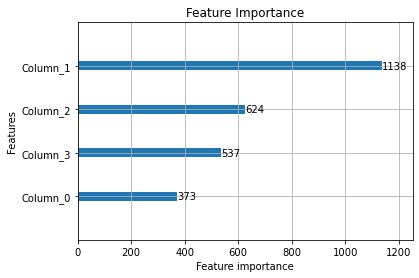

In [68]:
plt.figure(figsize=(12,6))
lgb.plot_importance(clf, max_num_features=30)
plt.title("Feature Importance")
plt.show()

## Confusion Metrics

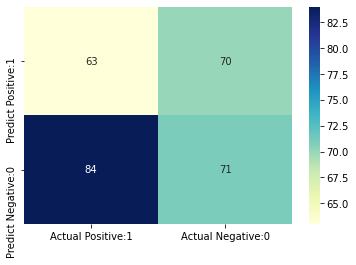

In [69]:
import seaborn as sns # statistical data visualization
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Parameters Tuning

In [70]:
from sklearn.model_selection import GridSearchCV

estimator = lgb.LGBMClassifier(boosting_type='gbdt',
                               objective = 'binary',
                               metric = '',
                               sub_feature=0.5
                              )

#parameters that has to be tuned
param_grid={
    'max_depth': [-1,1,2,6,8],
    'num_leaves': [10,20,31,40],
}

gbm = GridSearchCV(estimator, param_grid,cv=5)
gbm.fit(X_train, y_train)
print('Best params ', gbm.best_params_)

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.5. Current value: feature_fraction=0.5
[LightGBM] [Warning] Unknown parameter: min_leaves
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.5. Current value: feature_fraction=0.5
[LightGBM] [Warning] Unknown parameter: min_leaves
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.5. Current value: feature_fraction=0.5
[LightGBM] [Warning] Unknown parameter: min_leaves
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.5. Current value: feature_fraction=0.5
[LightGBM] [Warning] Unknown parameter: min_leaves
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.5. Current value: feature_fraction=0.5
[LightGBM] [Warning] Unknown parameter: min_leaves
[LightGBM]

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.5. Current value: feature_fraction=0.5
[LightGBM] [Warning] Unknown parameter: min_leaves
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.5. Current value: feature_fraction=0.5
[LightGBM] [Warning] Unknown parameter: min_leaves
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.5. Current value: feature_fraction=0.5
[LightGBM] [Warning] Unknown parameter: min_leaves
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.5. Current value: feature_fraction=0.5
[LightGBM] [Warning] Unknown parameter: min_leaves
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.5. Current value: feature_fraction=0.5
[LightGBM] [Warning] Unknown parameter: min_leaves
[LightGBM]

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.5. Current value: feature_fraction=0.5
[LightGBM] [Warning] Unknown parameter: min_leaves
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.5. Current value: feature_fraction=0.5
[LightGBM] [Warning] Unknown parameter: min_leaves
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.5. Current value: feature_fraction=0.5
[LightGBM] [Warning] Unknown parameter: min_leaves
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.5. Current value: feature_fraction=0.5
[LightGBM] [Warning] Unknown parameter: min_leaves
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.5. Current value: feature_fraction=0.5
[LightGBM] [Warning] Unknown parameter: min_leaves
[LightGBM]

In [71]:
#Testing

#hyper parameters setting
params={'boosting_type':'gbdt',
        'objective':'binary',
        'metric':'',
        'learning_rate':0.05,
        'sub_feature':0.5,
        'min_data':20,
        'min_leaves':20,
        'max_depth':1,  #1
        'num_leaves':10  #10
       }

d_train = lgb.Dataset(X_train, label= y_train)

#set train model with 100 iterations
clf= lgb.train(params, d_train, 100)

y_pred = clf.predict(X_test)
print(y_pred)
for i in range(len(y_pred)):
    if (y_pred[i] >= ratio):
        y_pred[i] = 1
    else:
        y_pred[i] = 0
     
print(y_pred)



[LightGBM] [Warning] Unknown parameter: min_leaves
[LightGBM] [Info] Number of positive: 351, number of negative: 320
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000209 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 896
[LightGBM] [Info] Number of data points in the train set: 671, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.523100 -> initscore=0.092465
[LightGBM] [Info] Start training from score 0.092465
[0.56986465 0.53362737 0.51098063 0.50254419 0.37236781 0.57097595
 0.49371997 0.452282   0.61291434 0.52023109 0.56986465 0.57931312
 0.452282   0.60929916 0.49371997 0.37236781 0.52249156 0.61870513
 0.62495675 0.58298596 0.51098063 0.36298705 0.49371997 0.5445472
 0.52249156 0.43851277 0.52023109 0.53362737 0.60929916 0.62495675
 0.53362737 0.48656214 0.54023733 0.57333664 0.4798593  0.57931312
 0.49371997 0.39806521 0.54023733 0.52983972 0.5445472  0.648

# Fidelity Test Set

## Accuracy

In [72]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy after parameters tuning")
accuracy

Accuracy after parameters tuning


0.53125

## CM after parameters tuning

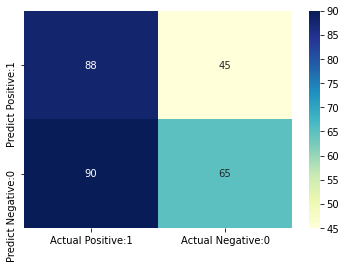

In [73]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Output

In [74]:
clf.save_model('lgb_classifier.txt', num_iteration=clf.best_iteration) 


In [75]:
ratio_list=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
accuracy_list=[]
model = lgb.Booster(model_file='lgb_classifier.txt')

for ratio in ratio_list:
    
    y_pred = model.predict(X_test)
    for i in range(len(y_pred)):
        if (y_pred[i] >= ratio):
            y_pred[i] = 1
        else:
            y_pred[i] = 0

    accuracy = accuracy_score(y_pred, y_test)
    
    accuracy_list.append(accuracy)

print(accuracy_list)




[0.5381944444444444, 0.5381944444444444, 0.5381944444444444, 0.5138888888888888, 0.4895833333333333, 0.4756944444444444, 0.4618055555555556, 0.4618055555555556, 0.4618055555555556]
